# Seasonal Decomposition

Here I will perform a seasonal decomposition on the data.


In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#find file to load
!ls 1.collect_data/data_files

2012.csv.zip                   2018.pkl
2012.pkl                       2019.csv.zip
2013.csv.zip                   2019.pkl
2013.pkl                       48hrs.pkl
2014.csv.zip                   5min.2019.pkl
2014.pkl                       5min.pkl
2015.csv.zip                   Blockface.csv
2015.pkl                       fixed.zip
2016.csv.zip                   kaggle_usholidays.csv
2016.pkl                       make_five_min_freq.py
2017.csv.zip                   test
2017.pkl                       transpose_and_trim_five_min.py
2018.csv.zip                   weather


In [6]:
#load in data
df = pd.read_pickle('1.collect_data/data_files/5min.2019.pkl')

In [7]:
# drop data where we are missing last few months

first_date = '2019-05-01 00:00:00'
second_date = '2019-10-01 00:00:00'

level_values = df.index.get_level_values
blocks = level_values(0).unique()

columns_to_drop = []

for block in blocks:
    subset = df.loc[(block, slice(first_date, second_date)), :]
    if len(subset) < 1000 and len(subset)>0:
        columns_to_drop.append(block)

In [8]:
df.head()

PaidOccupancy  ParkingSpaceCount
SourceElementKey OccupancyDateTime                                    
1001             2019-01-02 09:00:00            0.0                6.0
                 2019-01-02 09:05:00            0.0                6.0
                 2019-01-02 09:10:00            0.0                6.0
                 2019-01-02 09:15:00            0.0                6.0
                 2019-01-02 09:20:00            0.0                6.0

In [9]:
# make a new column for percent of occupied spaces
df['PercentOccupied'] = df['PaidOccupancy']/df['ParkingSpaceCount']
#df['PercentOccupied'] = df['PercentOccupied'].clip(None, 1)

In [10]:
# remove data before first date
df = df.loc[(slice(None), slice(first_date, second_date)), :]
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 19738492 entries, (1001, 2019-05-01 09:00:00) to (136322, 2019-08-30 19:55:00)
Data columns (total 3 columns):
PaidOccupancy        float64
ParkingSpaceCount    float64
PercentOccupied      float64
dtypes: float64(3)
memory usage: 567.4 MB


In [11]:
df.head()

PaidOccupancy  ParkingSpaceCount  \
SourceElementKey OccupancyDateTime                                       
1001             2019-05-01 09:00:00            0.0                4.0   
                 2019-05-01 09:05:00            0.0                4.0   
                 2019-05-01 09:10:00            0.0                4.0   
                 2019-05-01 09:15:00            0.0                4.0   
                 2019-05-01 09:20:00            0.0                4.0   

                                      PercentOccupied  
SourceElementKey OccupancyDateTime                     
1001             2019-05-01 09:00:00              0.0  
                 2019-05-01 09:05:00              0.0  
                 2019-05-01 09:10:00              0.0  
                 2019-05-01 09:15:00              0.0  
                 2019-05-01 09:20:00              0.0

### Pivot data and drop unnecessary column name

In [12]:
percent_occupied = df['PercentOccupied'].reset_index().pivot(index='OccupancyDateTime', columns='SourceElementKey')
percent_occupied.columns = percent_occupied.columns.droplevel()
#percent_occupied = percent_occupied.drop(columns_to_drop, axis=1)

In [13]:
percent_occupied.head()

SourceElementKey,1001,1002,1006,1009,1010,1013,1014,1017,1018,1021,...,130793,130799,130802,134101,134961,134962,134965,135261,136041,136322
OccupancyDateTime,,,,,,,,,,,,,,,,,,,,,
2019-05-01 08:00:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.142857,0.466667,0.0,0.377778,0.166667,0.0,0.25,0.0,0.42,0.028571
2019-05-01 08:05:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.142857,0.500000,0.0,0.444444,0.166667,0.0,0.25,0.0,0.40,0.142857
2019-05-01 08:10:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.142857,0.500000,0.0,0.444444,0.166667,0.0,0.25,0.0,0.40,0.142857
2019-05-01 08:15:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.142857,0.500000,0.0,0.444444,0.166667,0.0,0.25,0.0,0.48,0.142857
2019-05-01 08:20:00,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,...,0.142857,0.500000,0.0,0.444444,0.233333,0.0,0.25,0.0,0.50,0.142857


### Replace infs with nans

In [14]:
percent_occupied = percent_occupied.replace(np.inf, np.nan)

### Replace nans with mean of column

In [15]:
means = percent_occupied.mean()

percent_occupied.fillna(means, inplace=True)

In [16]:
percent_occupied.head()

SourceElementKey,1001,1002,1006,1009,1010,1013,1014,1017,1018,1021,...,130793,130799,130802,134101,134961,134962,134965,135261,136041,136322
OccupancyDateTime,,,,,,,,,,,,,,,,,,,,,
2019-05-01 08:00:00,0.383645,0.353939,0.348895,0.288956,0.596144,0.0,0.08648,0.935576,0.910067,0.0,...,0.142857,0.466667,0.0,0.377778,0.166667,0.0,0.25,0.0,0.42,0.028571
2019-05-01 08:05:00,0.383645,0.353939,0.348895,0.288956,0.596144,0.0,0.08648,0.935576,0.910067,0.0,...,0.142857,0.500000,0.0,0.444444,0.166667,0.0,0.25,0.0,0.40,0.142857
2019-05-01 08:10:00,0.383645,0.353939,0.348895,0.288956,0.596144,0.0,0.08648,0.935576,0.910067,0.0,...,0.142857,0.500000,0.0,0.444444,0.166667,0.0,0.25,0.0,0.40,0.142857
2019-05-01 08:15:00,0.383645,0.353939,0.348895,0.288956,0.596144,0.0,0.08648,0.935576,0.910067,0.0,...,0.142857,0.500000,0.0,0.444444,0.166667,0.0,0.25,0.0,0.48,0.142857
2019-05-01 08:20:00,0.383645,0.353939,0.348895,0.288956,0.596144,0.0,0.08648,0.935576,0.910067,0.0,...,0.142857,0.500000,0.0,0.444444,0.233333,0.0,0.25,0.0,0.50,0.142857


In [17]:
percent_occupied.describe()

SourceElementKey,1001,1002,1006,1009,1010,1013,1014,1017,1018,1021,...,130793,130799,130802,134101,134961,134962,134965,135261,136041,136322
count,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,...,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000,17472.000000
mean,0.383645,0.353939,0.348895,0.288956,0.596144,0.309108,0.086480,0.935576,0.910067,0.509158,...,0.268438,0.501100,0.358249,0.383658,0.241885,0.313757,0.273842,0.087373,0.355439,0.165438
std,0.276799,0.217457,0.199342,0.224420,0.254122,0.269488,0.122635,0.298007,0.242070,0.243702,...,0.229462,0.247339,0.219559,0.271118,0.254032,0.251941,0.257818,0.091706,0.206162,0.192780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.353939,0.285714,0.200000,0.596144,0.000000,0.000000,0.911111,0.900000,0.400000,...,0.142857,0.333333,0.166667,0.111111,0.125000,0.250000,0.142857,0.087373,0.200000,0.000000
50%,0.383645,0.353939,0.348895,0.288956,0.596144,0.250000,0.086480,0.935576,0.910067,0.509158,...,0.268438,0.501100,0.358249,0.333333,0.241885,0.313757,0.273842,0.087373,0.355439,0.142857
75%,0.383645,0.353939,0.348895,0.288956,0.600000,0.500000,0.086480,1.088889,1.000000,0.660000,...,0.285714,0.666667,0.358249,0.555556,0.250000,0.350000,0.285714,0.087373,0.500000,0.165438
max,4.750000,5.325000,2.285714,4.760000,1.720000,1.900000,1.111111,4.044444,3.000000,3.200000,...,3.571429,1.666667,1.500000,1.688889,6.333333,4.000000,5.625000,1.000000,1.200000,2.942857


In [18]:
percent_occupied.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17472 entries, 2019-05-01 08:00:00 to 2019-08-31 21:55:00
Columns: 1482 entries, 1001 to 136322
dtypes: float64(1482)
memory usage: 197.7 MB


### Resample to have data for overnight and weekends

In [19]:
percent_occupied = percent_occupied.asfreq(freq='5min')
percent_occupied.fillna(means, inplace=True)

In [72]:
percent_occupied.describe()

SourceElementKey,1001,1002,1006,1009,1010,1013,1014,1017,1018,1021,...,130793,130799,130802,134101,134961,134962,134965,135261,136041,136322
count,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,...,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000,35304.000000
mean,0.383645,0.353939,0.348895,0.288956,0.596144,0.309108,0.086480,0.935576,0.910067,0.509158,...,0.268438,0.501100,0.358249,0.383658,0.241885,0.313757,0.273842,0.087373,0.355439,0.165438
std,0.194723,0.152977,0.140234,0.157876,0.178770,0.189580,0.086272,0.209643,0.170292,0.171440,...,0.161422,0.173999,0.154456,0.190727,0.178707,0.177236,0.181371,0.064514,0.145031,0.135617
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.383645,0.353939,0.348895,0.288956,0.596144,0.250000,0.086480,0.935576,0.910067,0.509158,...,0.268438,0.501100,0.358249,0.333333,0.241885,0.313757,0.273842,0.087373,0.355439,0.142857
50%,0.383645,0.353939,0.348895,0.288956,0.596144,0.309108,0.086480,0.935576,0.910067,0.509158,...,0.268438,0.501100,0.358249,0.383658,0.241885,0.313757,0.273842,0.087373,0.355439,0.165438
75%,0.383645,0.353939,0.348895,0.288956,0.596144,0.309108,0.086480,0.935576,0.910067,0.509158,...,0.268438,0.501100,0.358249,0.383658,0.241885,0.313757,0.273842,0.087373,0.355439,0.165438
max,4.750000,5.325000,2.285714,4.760000,1.720000,1.900000,1.111111,4.044444,3.000000,3.200000,...,3.571429,1.666667,1.500000,1.688889,6.333333,4.000000,5.625000,1.000000,1.200000,2.942857


In [73]:
all_results = []
for column in percent_occupied.columns:
    results = seasonal_decompose(percent_occupied[column], freq=1, model='additive')
    all_results.append(results)
#result_spaces = seasonal_decompose(available_spaces, model='additive')

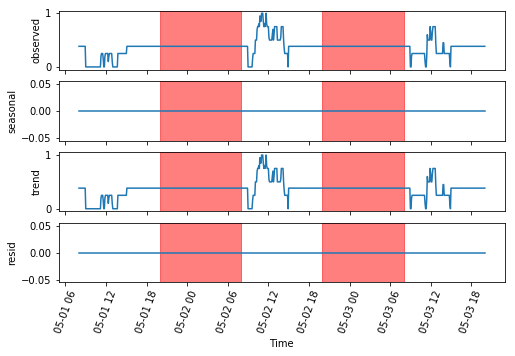

In [74]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 0

plt.xlabel('Time')

axs[0].plot(all_results[block_ind].observed.loc[:'2019-05-03 20:00:00'])
axs[1].plot(all_results[block_ind].seasonal.loc[:'2019-05-03 20:00:00'])
axs[2].plot(all_results[block_ind].trend.loc[:'2019-05-03 20:00:00'])
axs[3].plot(all_results[block_ind].resid.loc[:'2019-05-03 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    ax.axvspan('2019-05-01 20:00:00', '2019-05-02 08:00:00', alpha=0.5, color='red')
    ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()

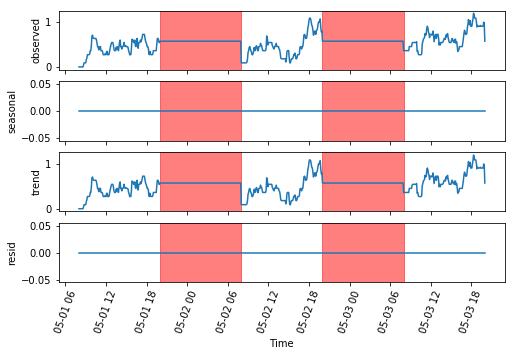

In [75]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 10

plt.xlabel('Time')

axs[0].plot(all_results[block_ind].observed.loc[:'2019-05-03 20:00:00'])
axs[1].plot(all_results[block_ind].seasonal.loc[:'2019-05-03 20:00:00'])
axs[2].plot(all_results[block_ind].trend.loc[:'2019-05-03 20:00:00'])
axs[3].plot(all_results[block_ind].resid.loc[:'2019-05-03 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    ax.axvspan('2019-05-01 20:00:00', '2019-05-02 08:00:00', alpha=0.5, color='red')
    ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()

# Hourly seasonal decompose

In [76]:
hour_results = []
for column in hour_occupied.columns:
    results = seasonal_decompose(percent_occupied[column], freq=12, model='additive')
    hour_results.append(results)

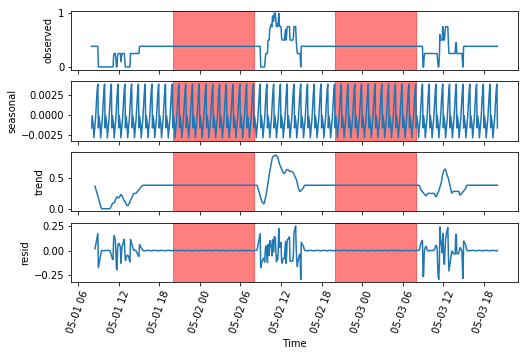

In [77]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 0

plt.xlabel('Time')

axs[0].plot(hour_results[block_ind].observed.loc[:'2019-05-03 20:00:00'])
axs[1].plot(hour_results[block_ind].seasonal.loc[:'2019-05-03 20:00:00'])
axs[2].plot(hour_results[block_ind].trend.loc[:'2019-05-03 20:00:00'])
axs[3].plot(hour_results[block_ind].resid.loc[:'2019-05-03 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    ax.axvspan('2019-05-01 20:00:00', '2019-05-02 08:00:00', alpha=0.5, color='red')
    ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()

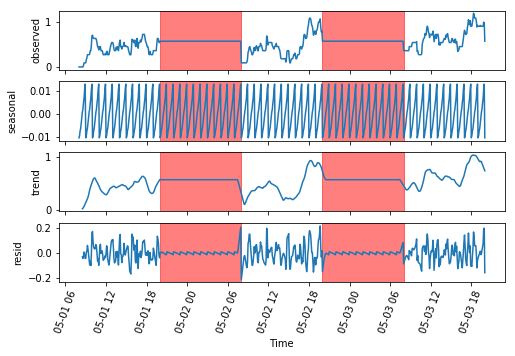

In [78]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 10

plt.xlabel('Time')

axs[0].plot(hour_results[block_ind].observed.loc[:'2019-05-03 20:00:00'])
axs[1].plot(hour_results[block_ind].seasonal.loc[:'2019-05-03 20:00:00'])
axs[2].plot(hour_results[block_ind].trend.loc[:'2019-05-03 20:00:00'])
axs[3].plot(hour_results[block_ind].resid.loc[:'2019-05-03 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    ax.axvspan('2019-05-01 20:00:00', '2019-05-02 08:00:00', alpha=0.5, color='red')
    ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()

# Daily Seasonal Decomposition

In [79]:
day_results = []
for column in hour_occupied.columns:
    results = seasonal_decompose(percent_occupied[column], freq=288, model='additive')
    day_results.append(results)

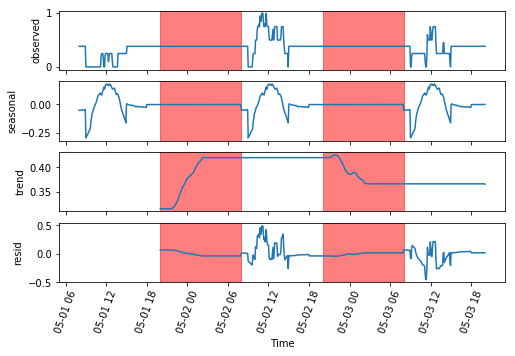

In [80]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 0

plt.xlabel('Time')

axs[0].plot(day_results[block_ind].observed.loc[:'2019-05-03 20:00:00'])
axs[1].plot(day_results[block_ind].seasonal.loc[:'2019-05-03 20:00:00'])
axs[2].plot(day_results[block_ind].trend.loc[:'2019-05-03 20:00:00'])
axs[3].plot(day_results[block_ind].resid.loc[:'2019-05-03 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    ax.axvspan('2019-05-01 20:00:00', '2019-05-02 08:00:00', alpha=0.5, color='red')
    ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()

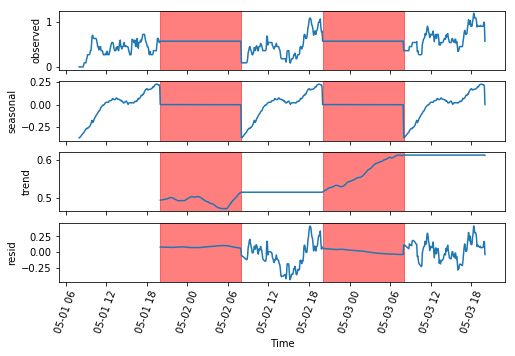

In [81]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 10

plt.xlabel('Time')

axs[0].plot(day_results[block_ind].observed.loc[:'2019-05-03 20:00:00'])
axs[1].plot(day_results[block_ind].seasonal.loc[:'2019-05-03 20:00:00'])
axs[2].plot(day_results[block_ind].trend.loc[:'2019-05-03 20:00:00'])
axs[3].plot(day_results[block_ind].resid.loc[:'2019-05-03 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    ax.axvspan('2019-05-01 20:00:00', '2019-05-02 08:00:00', alpha=0.5, color='red')
    ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()

# Weekly Seasonal Decompose

In [82]:
week_results = []
for column in hour_occupied.columns:
    results = seasonal_decompose(percent_occupied[column], freq=2016, model='additive')
    week_results.append(results)

In [ ]:
fig, axs = plt.subplots(4,1, figsize=(8,5), sharex=True)

block_ind = 0

plt.xlabel('Time')

axs[0].plot(week_results[block_ind].observed.loc[:'2019-05-30 20:00:00'])
axs[1].plot(week_results[block_ind].seasonal.loc[:'2019-05-30 20:00:00'])
axs[2].plot(week_results[block_ind].trend.loc[:'2019-05-30 20:00:00'])
axs[3].plot(week_results[block_ind].resid.loc[:'2019-05-30 20:00:00'])

ylabels = ['observed', 'seasonal', 'trend', 'resid']

for i, ax in enumerate(axs.ravel()):
    ax.xaxis.set_tick_params(rotation=70)
    ax.set_ylabel(ylabels[i])
    for j in range(30):
        ax.axvspan('2019-05-%02d 20:00:00' % (j+1), '2019-05-%02d 08:00:00' % (j+2), alpha=0.5, color='red')
    #ax.axvspan('2019-05-02 20:00:00', '2019-05-03 08:00:00', alpha=0.5, color='red')


#fig.text(0.04, 0.5, 'Observed Data', va='center', rotation='vertical')
plt.show()